## Setup

### Configure API keys

To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

- Go to your [`Roboflow Settings`](https://app.roboflow.com/settings/api) page. Click `Copy`. This will place your private key in the clipboard.
- In Colab, go to the left pane and click on `Secrets` (🔑). Store Roboflow API Key under the name `ROBOFLOW_API_KEY`.

In [32]:
# ultralytics의 버전을 최신 버전으로 설치
!pip install ultralytics

In [ ]:
# 현재 디렉토리가 어디인지 확인
!pwd

/content


### Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [51]:
# 내 컴퓨터의 nvidia 그래픽 드라이버 정보 확인
!nvidia-smi

Thu Aug  7 09:01:57 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 570.133.20             Driver Version: 570.133.20     CUDA Version: 12.8     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8             13W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [ ]:
import os
# 현재 작업 디렉토리 HOME으로 지정
HOME = os.getcwd()
print(HOME)

/content/datasets


## Install YOLO11 via Ultralytics

In [52]:
# %pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()  # ultralytics의 버전을 체크

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 14914MiB)
Setup complete ✅ (4 CPUs, 14.6 GB RAM, 50.9/94.3 GB disk)


In [55]:
!yolo task=detect mode=predict model=yolo11s.pt conf=0.25 source='/content/datasets/all_combined/test/images/P20230602_103840601_9950267D-7156-47B4-8839-E535318CC477_JPG.rf.0b61ae6855f70a37360bd22e20b8d00c.jpg' save=True

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 14914MiB)
YOLO11s summary (fused): 100 layers, 9,443,760 parameters, 0 gradients, 21.5 GFLOPs

image 1/1 /content/datasets/all_combined/test/images/P20230602_103840601_9950267D-7156-47B4-8839-E535318CC477_JPG.rf.0b61ae6855f70a37360bd22e20b8d00c.jpg: 640x640 1 bottle, 15.8ms
Speed: 2.7ms preprocess, 15.8ms inference, 168.5ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict


## Fine-tune YOLO11 on custom dataset

In [36]:
# 구글드라이브에 업로드된 파일을 다운로드

!pip install gdown
!gdown "https://drive.google.com/file/d/1jB0xe967eBWEHFgdsWbLkWnlxmQjj_j_/view?usp=drive_link"

/usr/local/lib/python3.11/dist-packages/gdown/parse_url.py:48: UserWarning: You specified a Google Drive link that is not the correct link to download a file. You might want to try `--fuzzy` option or the following url: https://drive.google.com/uc?id=1jB0xe967eBWEHFgdsWbLkWnlxmQjj_j_
  warnings.warn(
Downloading...
From: https://drive.google.com/file/d/1jB0xe967eBWEHFgdsWbLkWnlxmQjj_j_/view?usp=drive_link
To: /content/datasets/view?usp=drive_link
102kB [00:00, 29.0MB/s]


In [33]:
import os
# 현재 작업 디렉토리 HOME으로 지정
HOME = os.getcwd()
print(HOME)

/content


In [34]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

# from google.colab import userdata
# from roboflow import Roboflow

# !curl -L "https://public.roboflow.com/ds/hDSSsXVi0C?key=aDIR2OQIZs" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

# ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
# rf = Roboflow(api_key=ROBOFLOW_API_KEY)

# workspace = rf.workspace("liangdianzhong")
# project = workspace.project("-qvdww")
# version = project.version(3)
# dataset = version.download("yolov11")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets


In [35]:
!pwd

/content/datasets


In [37]:
# prompt: 구글드라이브 링크 주소로 colab enterprise에서 다운로드 하는 코드를 생성

!gdown --id "1jB0xe967eBWEHFgdsWbLkWnlxmQjj_j_" -O /content/datasets/all_combined.zip


/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1jB0xe967eBWEHFgdsWbLkWnlxmQjj_j_
From (redirected): https://drive.google.com/uc?id=1jB0xe967eBWEHFgdsWbLkWnlxmQjj_j_&confirm=t&uuid=311a5606-69cf-45d0-a07b-615c07b8a8e4
To: /content/datasets/all_combined.zip
100% 2.16G/2.16G [00:23<00:00, 91.5MB/s]


In [39]:
!unzip -qq /content/datasets/all_combined.zip -d /content/datasets/all_combined

## Custom Training

In [40]:
%cd {HOME}

!yolo task=detect mode=train model=yolo11n.pt data=/content/datasets/all_combined/data.yaml epochs=50 imgsz=640 plots=True

/content
Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 14914MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/all_combined/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True,

**NOTE:** The results of the completed training are saved in `{HOME}/runs/detect/train/`. Let's examine them.

In [41]:
!ls {HOME}/runs/detect/train4/

args.yaml			 labels.jpg	      train_batch9402.jpg
BoxF1_curve.png			 results.csv	      val_batch0_labels.jpg
BoxP_curve.png			 results.png	      val_batch0_pred.jpg
BoxPR_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
BoxR_curve.png			 train_batch1.jpg     val_batch1_pred.jpg
confusion_matrix_normalized.png  train_batch2.jpg     val_batch2_labels.jpg
confusion_matrix.png		 train_batch9400.jpg  val_batch2_pred.jpg
labels_correlogram.jpg		 train_batch9401.jpg  weights


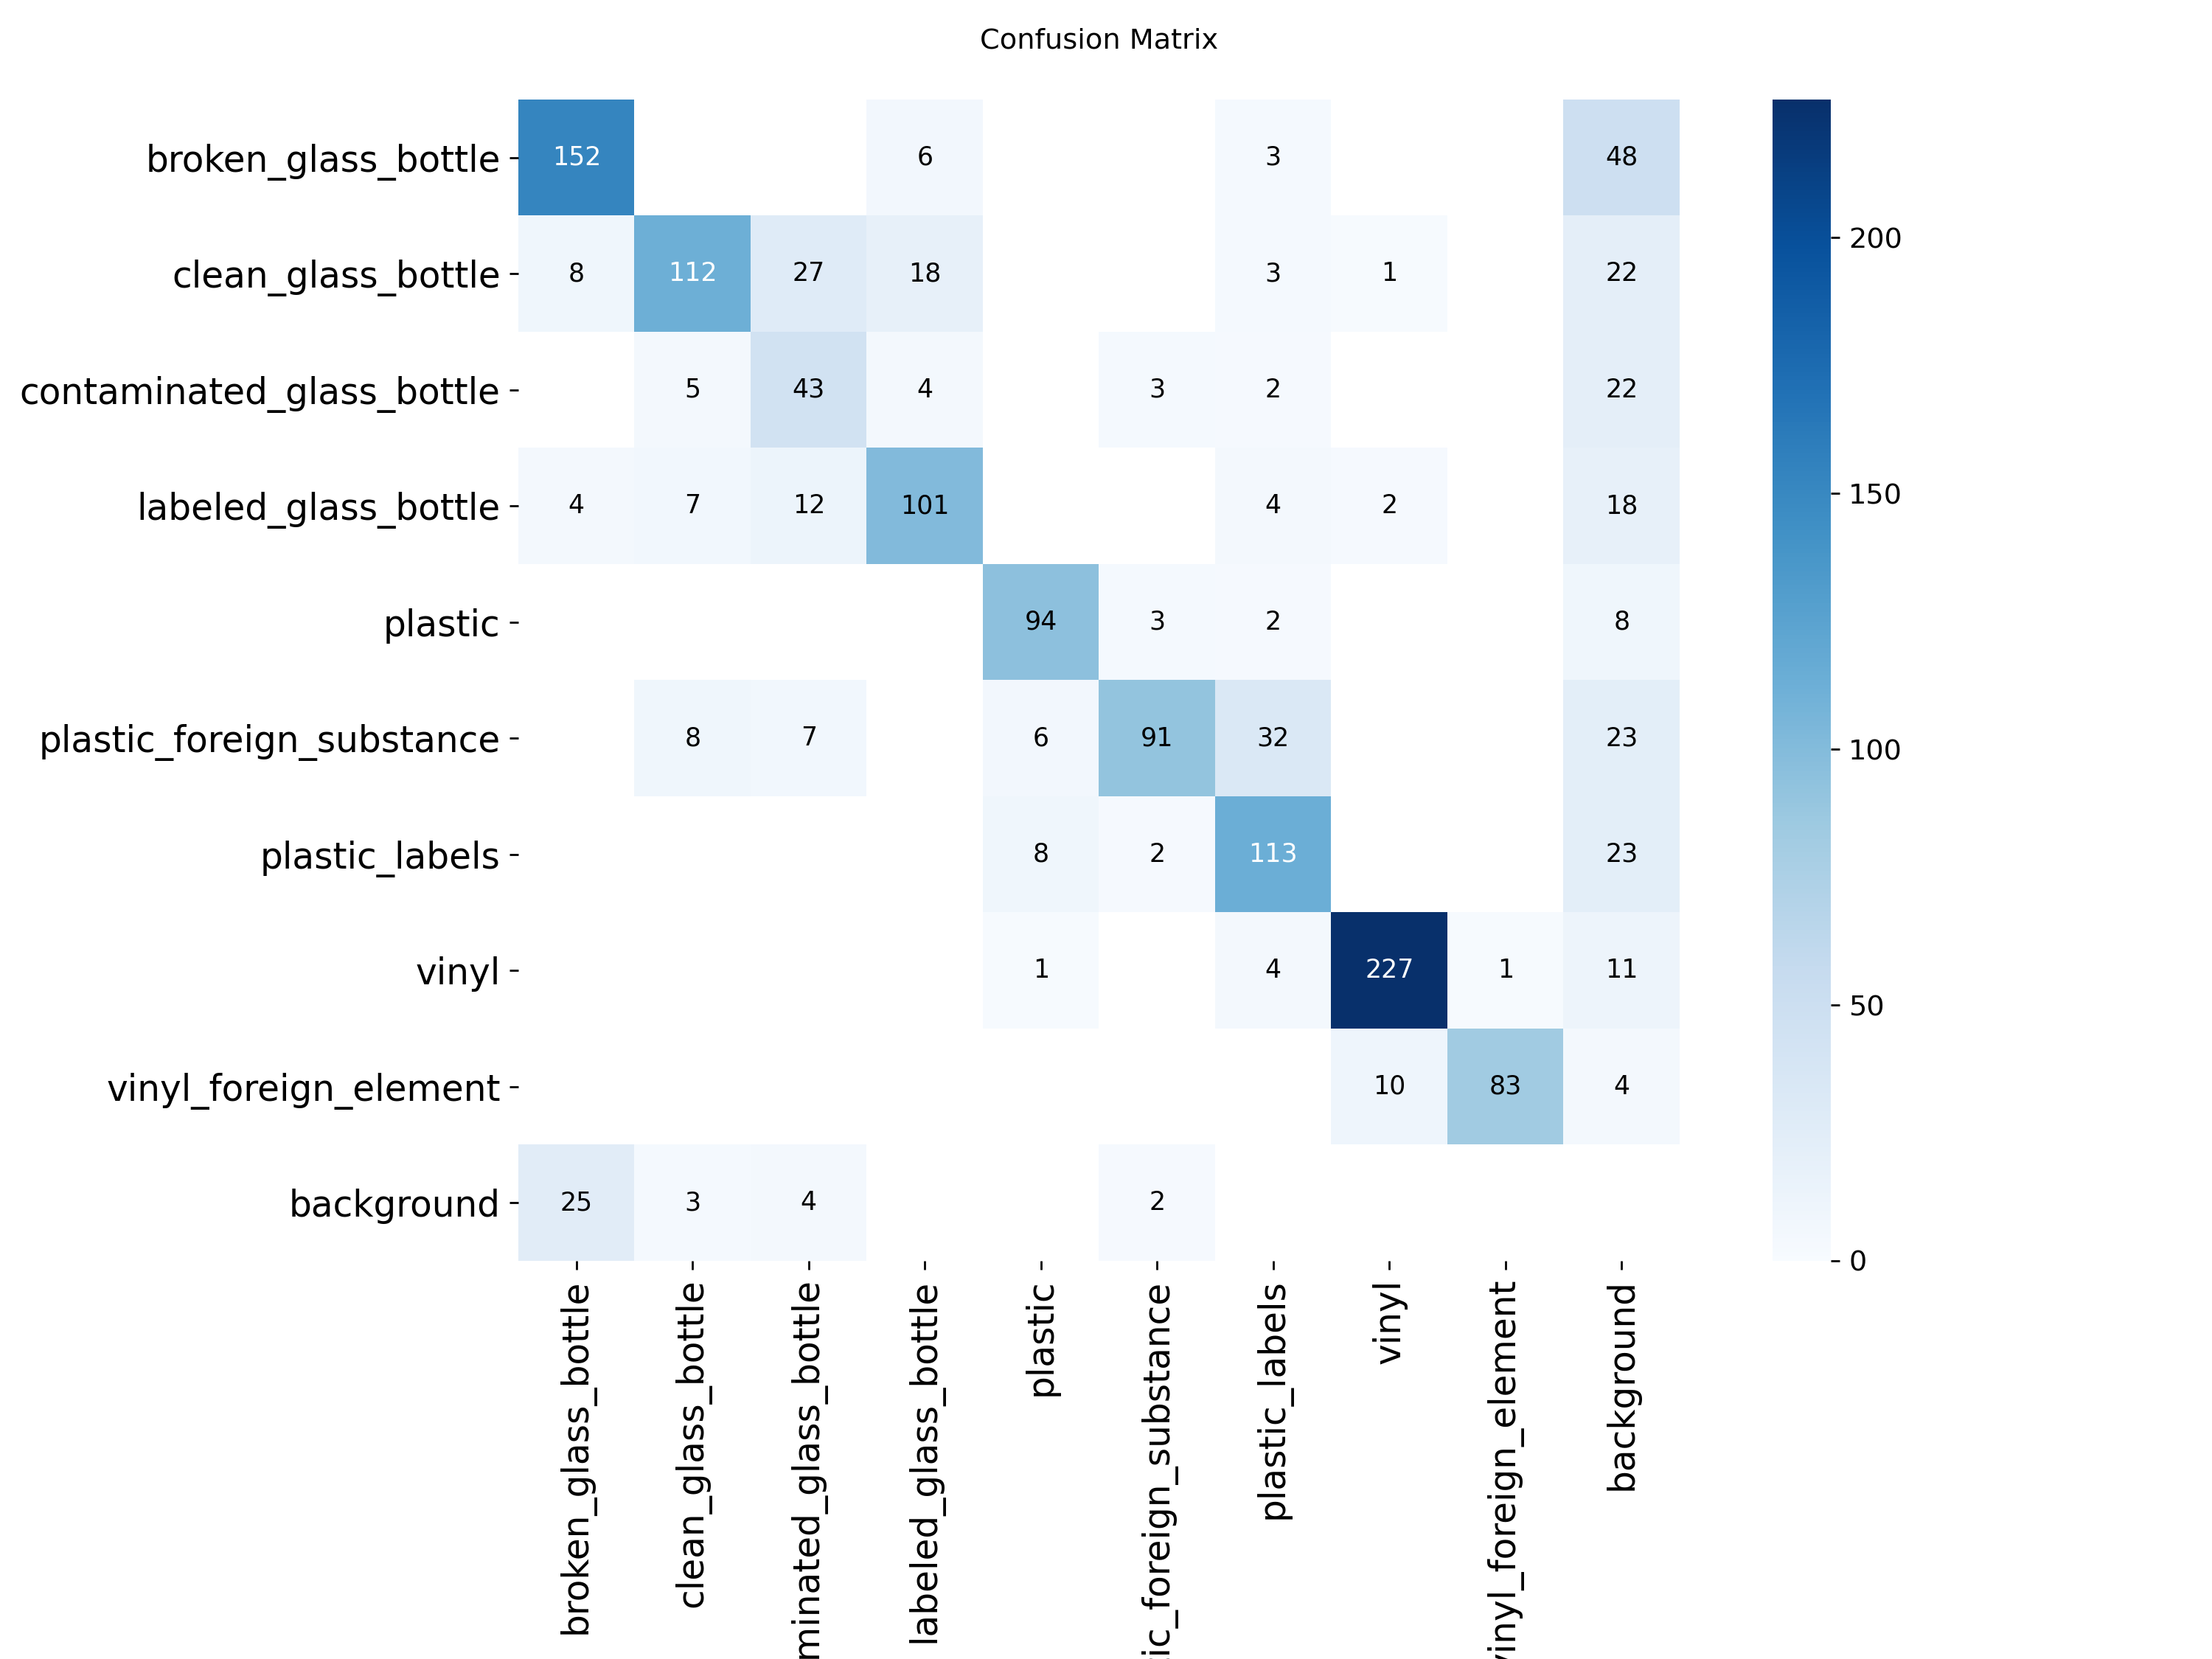

In [42]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train4/confusion_matrix.png', width=600)

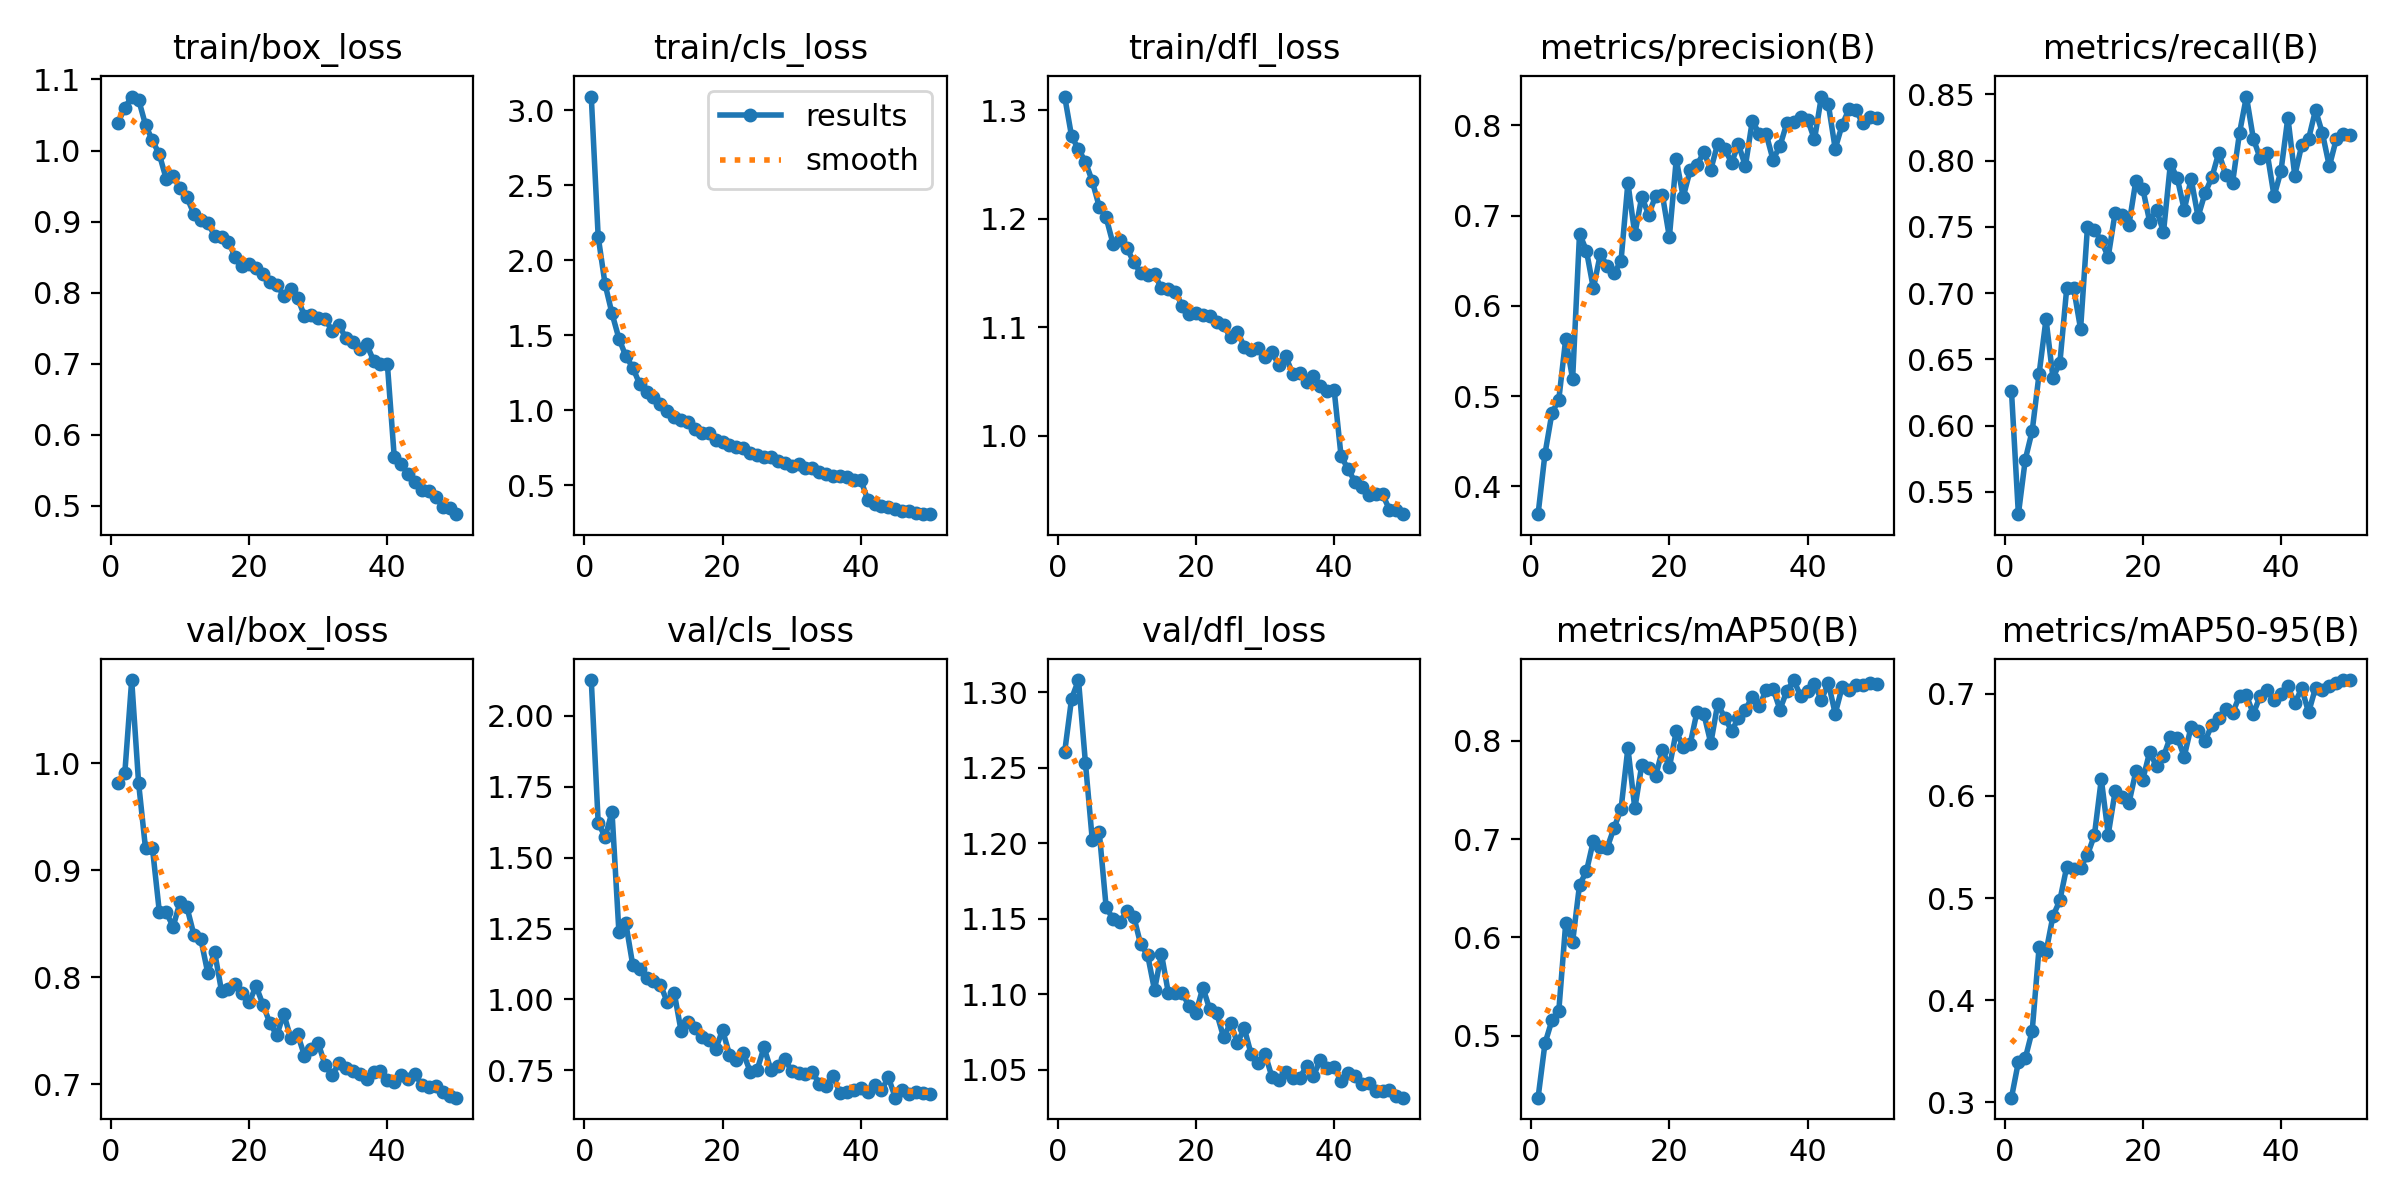

In [43]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train4/results.png', width=600)

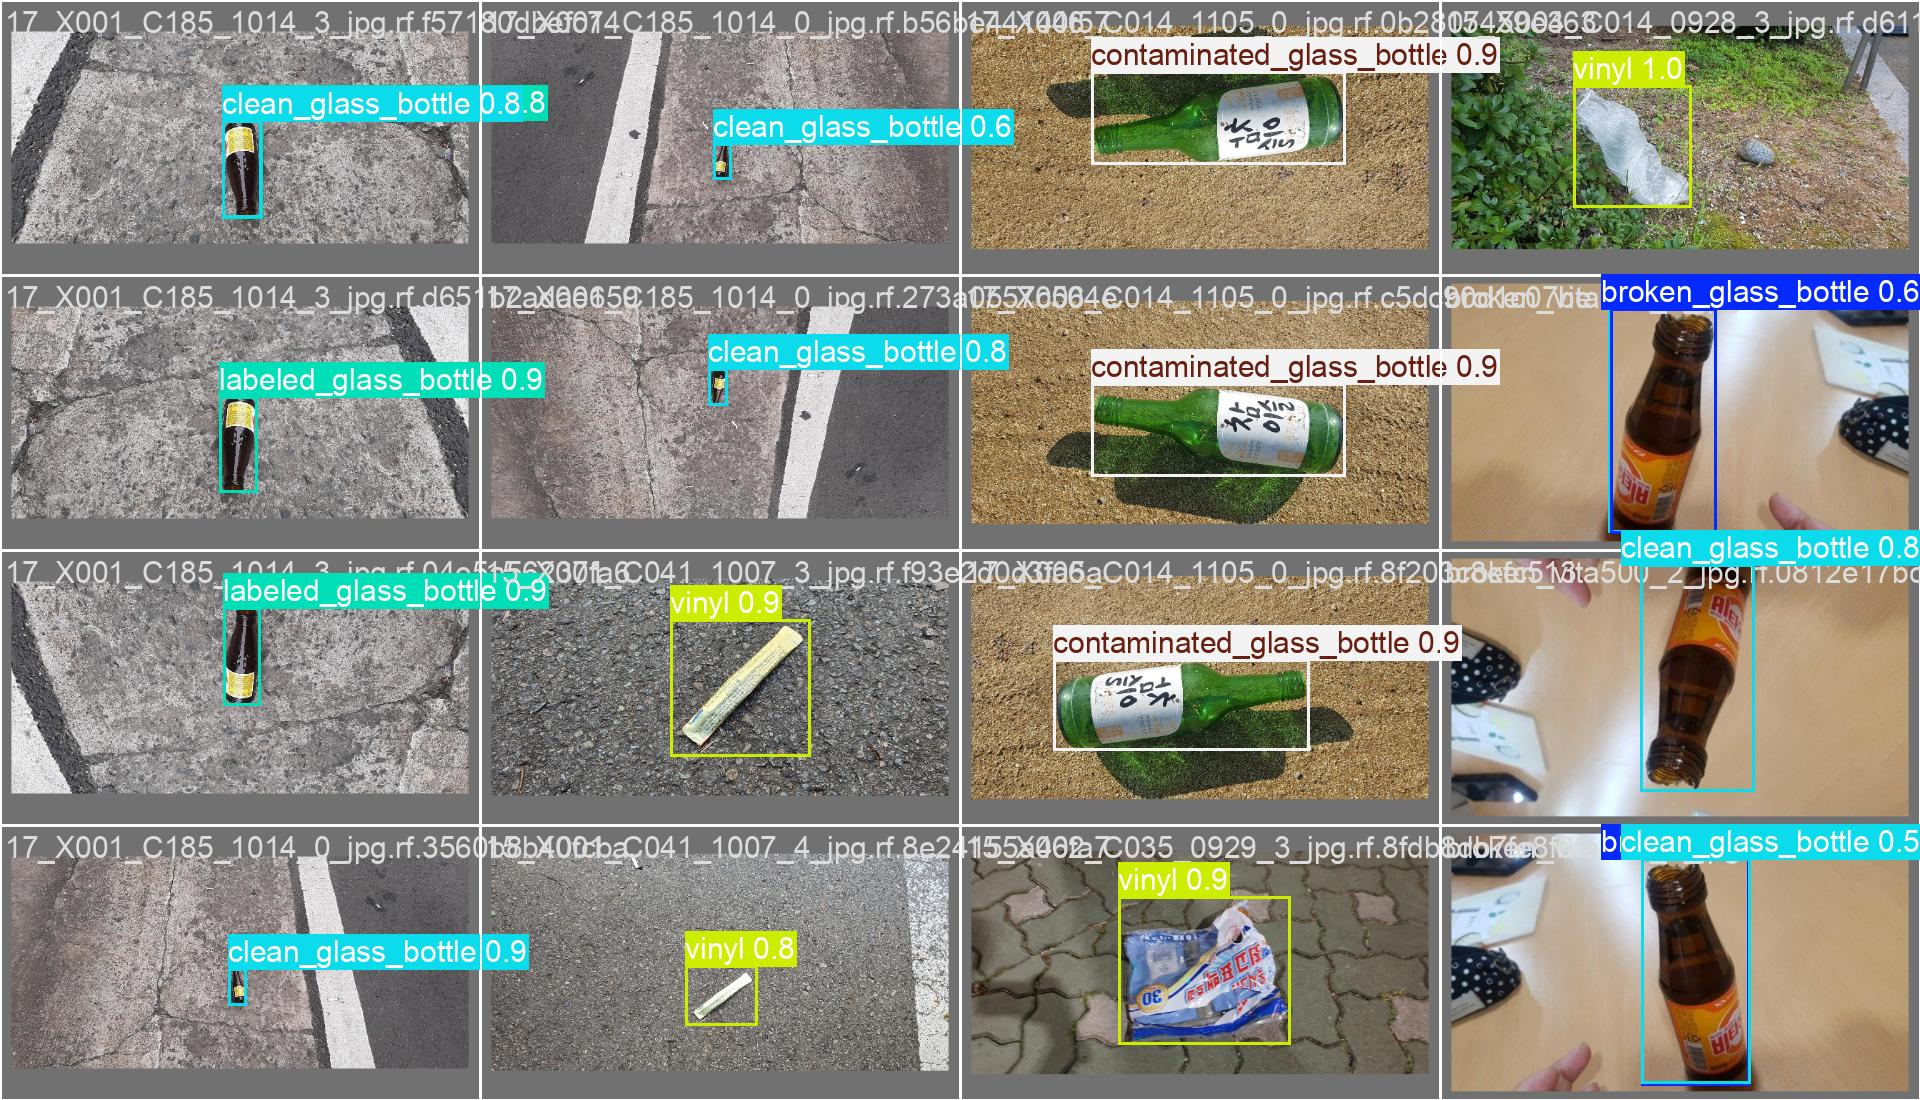

In [44]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train4/val_batch0_pred.jpg', width=600)

## Validate fine-tuned model

In [49]:
!yolo task=detect mode=val model={HOME}/runs/detect/train4/weights/best.pt data=/content/datasets/all_combined/data.yaml

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 14914MiB)
YOLO11n summary (fused): 100 layers, 2,583,907 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2539.7±1156.0 MB/s, size: 701.6 KB)
val: Scanning /content/datasets/valid/labels.cache... 1096 images, 0 backgrounds, 0 corrupt: 100% 1096/1096 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 15, len(boxes) = 1243. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 69/69 [00:10<00:00,  6.83it/s]
                   all       1096       1243      0.809       0.82       0.86      0.714
   broken_glass_bottle         87        189      0.817       0.78      0.804      0.516
    clean_glass_bottle        126        135   

## Inference with custom model

In [59]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=/content/runs/detect/predict2/P20230602_103840601_9950267D-7156-47B4-8839-E535318CC477_JPG.rf.0b61ae6855f70a37360bd22e20b8d00c.jpg save=True

Ultralytics 8.3.175 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 14914MiB)
YOLO11n summary (fused): 100 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs

image 1/1 /content/runs/detect/predict2/P20230602_103840601_9950267D-7156-47B4-8839-E535318CC477_JPG.rf.0b61ae6855f70a37360bd22e20b8d00c.jpg: 640x640 1 Contaminated Glass Bottle, 8.6ms
Speed: 2.6ms preprocess, 8.6ms inference, 177.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


**NOTE:** Let's take a look at few results.

In [ ]:
project.version(dataset.version).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")